In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 读取CSV文件
df = pd.read_csv('heliport.csv', header=None, names=['x', 'y', 'name'])

# 去除名称列中的空格
df['name'] = df['name'].str.strip()

# 定义坐标转换参数
# 经度转换：x=1对应74°15'，x=10对应73°45'
# 纬度转换：y=1对应40°30'，y=10对应41°00'

# 将度分转换为十进制度
lon_1 = 74 + 15/60  # 74°15' = 74.25°
lon_10 = 73 + 45/60  # 73°45' = 73.75°
lat_1 = 40 + 30/60  # 40°30' = 40.5°
lat_10 = 41 + 0/60   # 41°00' = 41.0°

# 计算转换系数
# 经度：随着x增加，经度减小（向西）
lon_slope = (lon_10 - lon_1) / (10 - 1)
lon_intercept = lon_1 - lon_slope * 1

# 纬度：随着y增加，纬度增加（向北）
lat_slope = (lat_10 - lat_1) / (10 - 1)
lat_intercept = lat_1 - lat_slope * 1

print("坐标转换系数:")
print(f"经度: y = {lon_slope:.6f} * x + {lon_intercept:.6f}")
print(f"纬度: y = {lat_slope:.6f} * x + {lat_intercept:.6f}")
print()

# 转换坐标
df['longitude'] = lon_slope * df['x'] + lon_intercept
df['latitude'] = lat_slope * df['y'] + lat_intercept

# 将十进制度转换为度分秒格式
def decimal_to_dms(decimal_deg):
    degrees = int(decimal_deg)
    minutes_float = abs(decimal_deg - degrees) * 60
    minutes = int(minutes_float)
    seconds = (minutes_float - minutes) * 60
    return f"{degrees}°{minutes}'{seconds:.2f}\""

df['longitude_dms'] = df['longitude'].apply(decimal_to_dms)
df['latitude_dms'] = df['latitude'].apply(decimal_to_dms)

# 保存结果到新文件
output_df = df[['longitude', 'latitude', 'name', 'x', 'y', 'longitude_dms', 'latitude_dms']]
# 显示转换后的数据框
print("\n转换后的数据框:")
print(df[['name', 'longitude', 'latitude']])

In [ ]:
# 读取CSV文件
df = pd.read_csv('MedicalCenter.csv', header=None, names=['x', 'y', 'name'])

# 去除名称列中的空格
df['name'] = df['name'].str.strip()

# 定义坐标转换参数
# 经度转换：x=1对应74°15'，x=10对应73°45'
# 纬度转换：y=1对应40°30'，y=10对应41°00'

# 将度分转换为十进制度
lon_1 = 74 + 15/60  # 74°15' = 74.25°
lon_10 = 73 + 45/60  # 73°45' = 73.75°
lat_1 = 40 + 30/60  # 40°30' = 40.5°
lat_10 = 41 + 0/60   # 41°00' = 41.0°

# 计算转换系数
# 经度：随着x增加，经度减小（向西）
lon_slope = (lon_10 - lon_1) / (10 - 1)
lon_intercept = lon_1 - lon_slope * 1

# 纬度：随着y增加，纬度增加（向北）
lat_slope = (lat_10 - lat_1) / (10 - 1)
lat_intercept = lat_1 - lat_slope * 1

print("坐标转换系数:")
print(f"经度: y = {lon_slope:.6f} * x + {lon_intercept:.6f}")
print(f"纬度: y = {lat_slope:.6f} * x + {lat_intercept:.6f}")
print()

# 转换坐标
df['longitude'] = lon_slope * df['x'] + lon_intercept
df['latitude'] = lat_slope * df['y'] + lat_intercept

# 将十进制度转换为度分秒格式
def decimal_to_dms(decimal_deg):
    degrees = int(decimal_deg)
    minutes_float = abs(decimal_deg - degrees) * 60
    minutes = int(minutes_float)
    seconds = (minutes_float - minutes) * 60
    return f"{degrees}°{minutes}'{seconds:.2f}\""

df['longitude_dms'] = df['longitude'].apply(decimal_to_dms)
df['latitude_dms'] = df['latitude'].apply(decimal_to_dms)

# 保存结果到新文件
output_df = df[['longitude', 'latitude', 'name', 'x', 'y', 'longitude_dms', 'latitude_dms']]
# 显示转换后的数据框
print("\n转换后的数据框:")
print(df[['name', 'longitude', 'latitude']])

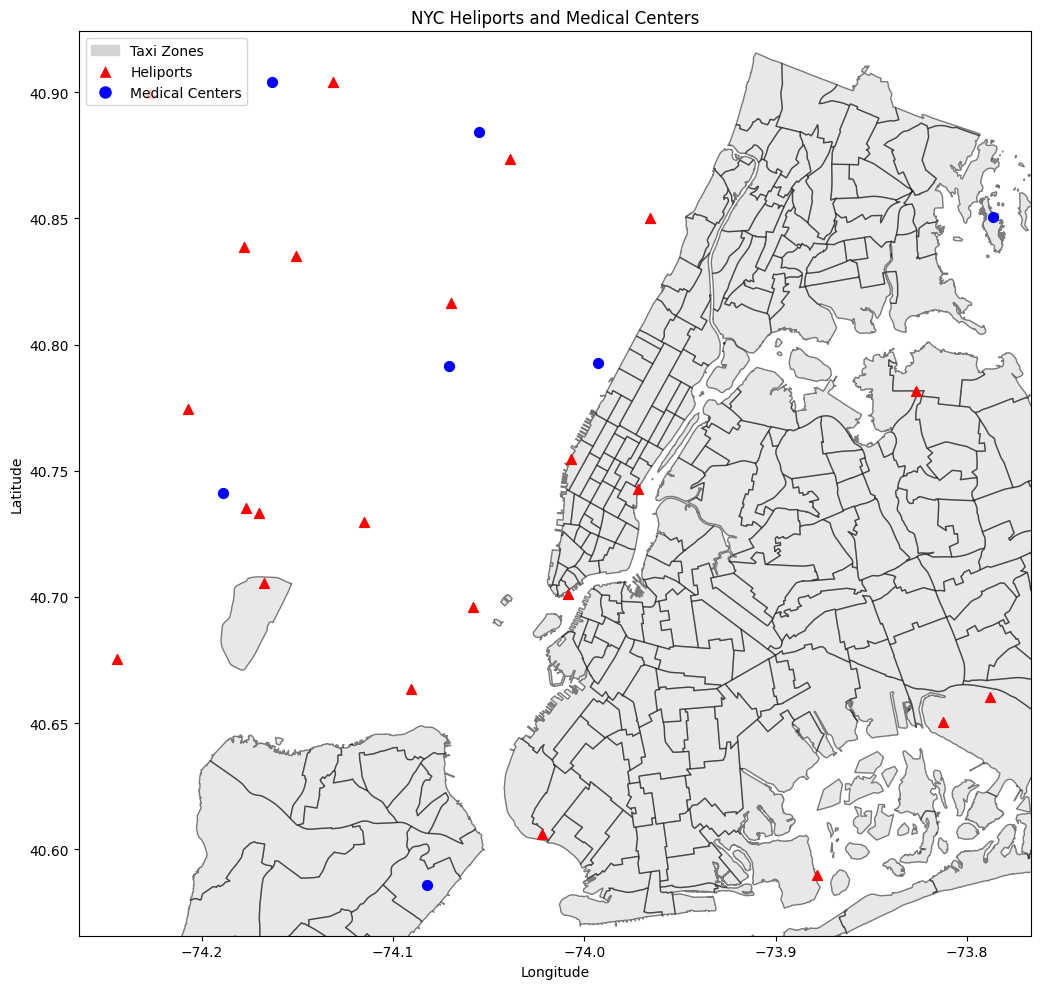

In [6]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

# 读取直升机场数据
df_heliport = pd.read_csv('heliport.csv', header=None, names=['x', 'y', 'name'])
df_heliport['name'] = df_heliport['name'].str.strip()

# 读取医疗中心数据
df_medical = pd.read_csv('MedicalCenter.csv', header=None, names=['x', 'y', 'name'])
df_medical['name'] = df_medical['name'].str.strip()

# 定义坐标转换参数 - 注意：纽约在西半球，经度应该是负值
lon_1 = -(74 + 15/60)  # 74°15' W = -74.25°
lon_10 = -(73 + 45/60)  # 73°45' W = -73.75°
lat_1 = 40 + 30/60  # 40°30' N = 40.5°
lat_10 = 41 + 0/60   # 41°00' N = 41.0°

# 计算转换系数
lon_slope = (lon_10 - lon_1) / (10 - 1)
lon_intercept = lon_1 - lon_slope * 1
lat_slope = (lat_10 - lat_1) / (10 - 1)
lat_intercept = lat_1 - lat_slope * 1

# 转换坐标
df_heliport['longitude'] = lon_slope * df_heliport['x'] + lon_intercept
df_heliport['latitude'] = lat_slope * df_heliport['y'] + lat_intercept

df_medical['longitude'] = lon_slope * df_medical['x'] + lon_intercept
df_medical['latitude'] = lat_slope * df_medical['y'] + lat_intercept

# Load the NYC taxi zones shapefile
taxi_zones_gdf = gpd.read_file('data/raw/taxi_zones/taxi_zones.shp')

# 确保出租车区域使用正确的坐标系统
taxi_zones_gdf = taxi_zones_gdf.to_crs(epsg=4326)

# 创建一个图形
fig, ax = plt.subplots(figsize=(14, 10))

# 首先绘制出租车区域
taxi_zones_gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

# 将数据框转换为GeoDataFrame以便在地图上绘制
heliport_gdf = gpd.GeoDataFrame(
    df_heliport, 
    geometry=gpd.points_from_xy(df_heliport.longitude, df_heliport.latitude),
    crs="EPSG:4326"
)

medical_gdf = gpd.GeoDataFrame(
    df_medical, 
    geometry=gpd.points_from_xy(df_medical.longitude, df_medical.latitude),
    crs="EPSG:4326"
)

# 在地图上标注直升机场点（红色三角形）
heliport_gdf.plot(ax=ax, color='red', marker='^', markersize=50, label='Heliports')

# 在地图上标注医疗中心点（蓝色圆形）
medical_gdf.plot(ax=ax, color='blue', marker='o', markersize=50, label='Medical Centers')

# 设置地图显示范围，根据数据点调整
all_points = pd.concat([df_heliport, df_medical])
min_lon = all_points['longitude'].min() - 0.02
max_lon = all_points['longitude'].max() + 0.02
min_lat = all_points['latitude'].min() - 0.02
max_lat = all_points['latitude'].max() + 0.02

ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# 添加坐标轴标签
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 添加标题
plt.title("NYC Heliports and Medical Centers")

# 创建简化的图例
legend_handles = [
    Patch(color='lightgray', label='Taxi Zones'),
    Line2D([0], [0], marker='^', color='w', label='Heliports', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Medical Centers', markerfacecolor='blue', markersize=10)
]

# 更新图例
ax.legend(handles=legend_handles, loc='upper left', prop={'size': 10})

plt.tight_layout()
plt.show()
